In [1]:
#
# Import Libraries
#
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Your code to read data
df = pd.read_csv("RSCCASN.csv", index_col='DATE', parse_dates=True)
df.head()
# Print first few rows of data

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


In [4]:
# Set name of column as 'Sales'. Use - df.columns 
df.columns = ['sales']

In [5]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
df.head()

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


<Axes: xlabel='DATE'>

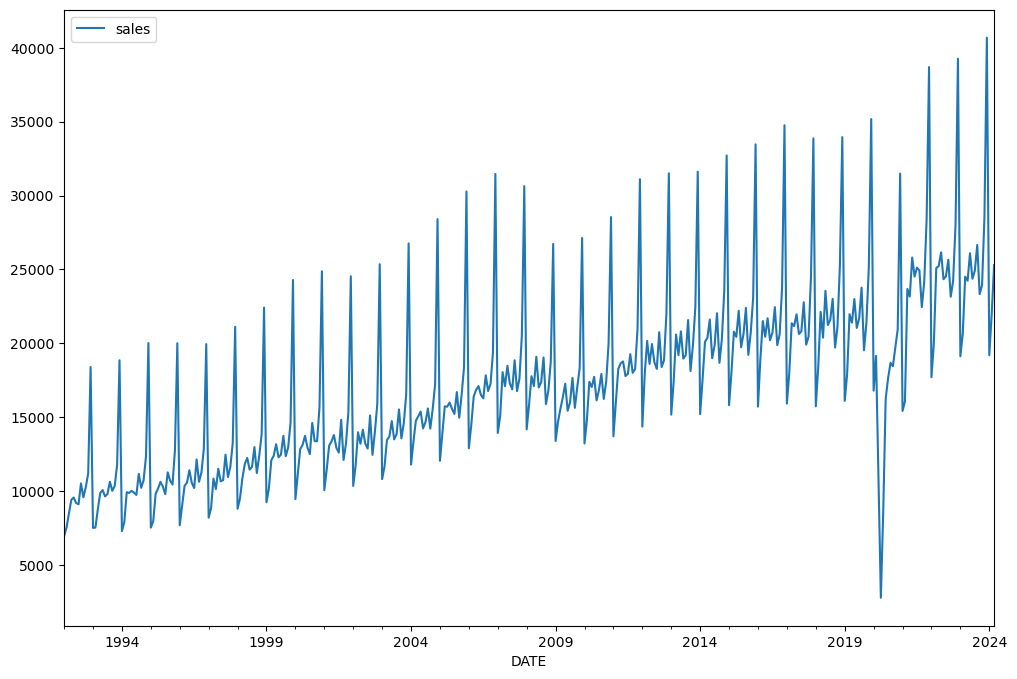

In [6]:
df.plot(figsize=(12,8))

In [7]:
test_size = 18

In [8]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
data_length = len(df)
data_length

387

In [9]:
len(df)- 18

369

In [10]:
train_size = data_length- test_size
train_size


369

In [11]:
test_index =  train_size

In [12]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [13]:
print(train.size)
print(test.size)

369
18


In [14]:

train

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2022-05-01,26156.0
2022-06-01,24338.0
2022-07-01,24530.0


In [15]:
test

,sales
DATE,
2022-10-01,24243.0
2022-11-01,28045.0
2022-12-01,39263.0
2023-01-01,19118.0
2023-02-01,20666.0
2023-03-01,24510.0
2023-04-01,24232.0
2023-05-01,26096.0
2023-06-01,24364.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [18]:
#
# Check if the data has been scaled properly
#
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0553158319645888
0.0
0.4549427911249687


In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [21]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11586537 0.13217895 0.15865371 0.1844325  0.18880321 0.17833579
 0.17613652 0.21538933 0.18922079 0.20817906 0.23415272 0.43481529]
Predict this y: 
 [[0.13156649]]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [23]:
# We're only using one feature in our time series
n_features = 1

In [24]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mse')

In [27]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping?
# Your code to create an object early-stop.

In [29]:
# Your code to fit your model.
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [30]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.
history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30

357/357 [==============================] - 4s 5ms/step - loss: 0.0196 - val_loss: 0.0868
Epoch 2/30
357/357 [==============================] - 2s 4ms/step - loss: 0.0147 - val_loss: 0.0309
Epoch 3/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 0.0147
Epoch 4/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0518
Epoch 5/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 6/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0020
Epoch 7/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0271
Epoch 8/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 9/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 10/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.004

In [31]:
losses = pd.DataFrame(model.history.history)

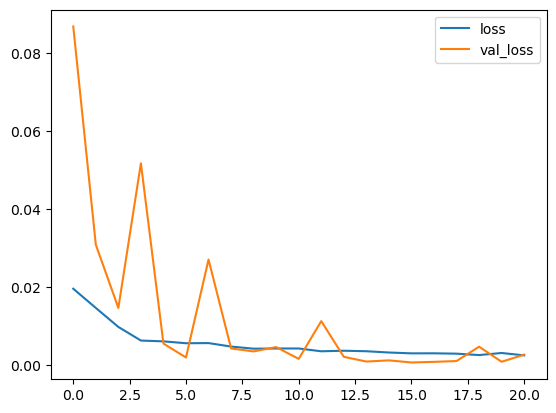

In [32]:
losses.plot();

C:\Users\mandh\AppData\Local\Temp\ipykernel_16560\2767392239.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


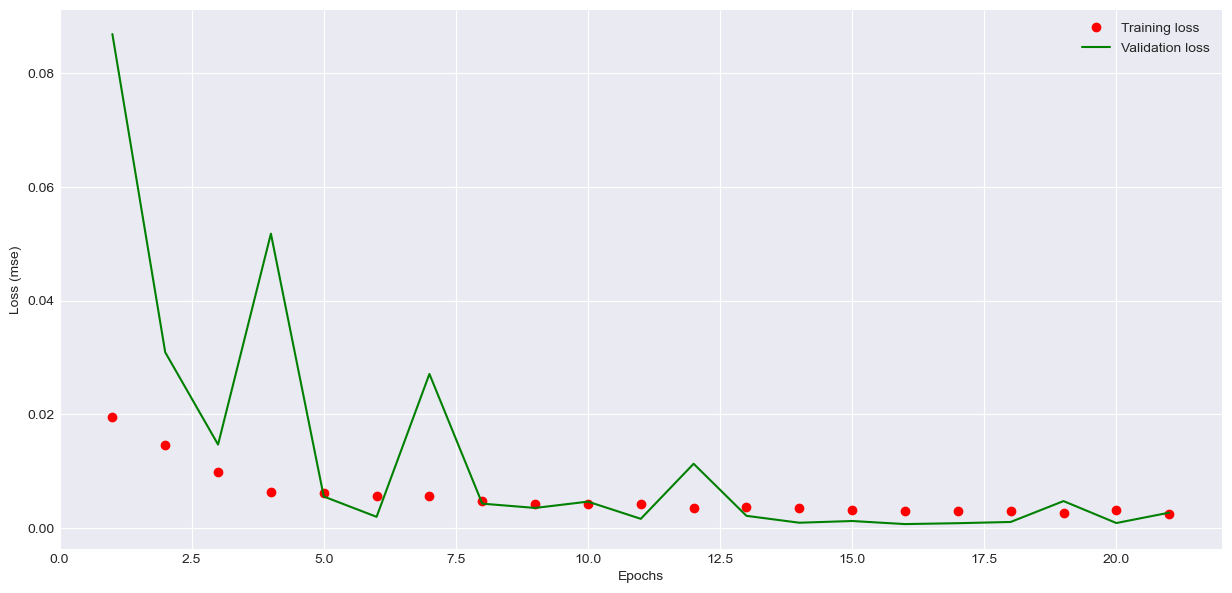

In [74]:
# printing Loss for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'ro', label='Training loss')
plt.plot(epochs, val_acc_values, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [34]:
first_eval_batch = scaled_train[-length:]

In [35]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 300ms/step


array([[0.5836724]], dtype=float32)

In [36]:
# compare with the true result:
scaled_test[0]

array([0.59761699])

In [37]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412],
        [0.56724479]]])

In [38]:
for i in range(len(test)):
    
    print(i)
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # store prediction
    test_predictions.append(current_pred) 
    print(test_predictions)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    print(current_batch)

0
1/1 [==============================] - 0s 16ms/step
[0.5836724]
[array([0.5836724], dtype=float32)]
[[[0.71362156]
  [1.        ]
  [0.41557863]
  [0.47983074]
  [0.62133571]
  [0.62492692]
  [0.65087275]
  [0.60026169]
  [0.60560675]
  [0.63681412]
  [0.56724479]
  [0.5836724 ]]]
1
1/1 [==============================] - 0s 18ms/step
[0.6843721]
[array([0.5836724], dtype=float32), array([0.6843721], dtype=float32)]
[[[1.        ]
  [0.41557863]
  [0.47983074]
  [0.62133571]
  [0.62492692]
  [0.65087275]
  [0.60026169]
  [0.60560675]
  [0.63681412]
  [0.56724479]
  [0.5836724 ]
  [0.68437213]]]
2
1/1 [==============================] - 0s 25ms/step
[0.9216948]
[array([0.5836724], dtype=float32), array([0.6843721], dtype=float32), array([0.9216948], dtype=float32)]
[[[0.41557863]
  [0.47983074]
  [0.62133571]
  [0.62492692]
  [0.65087275]
  [0.60026169]
  [0.60560675]
  [0.63681412]
  [0.56724479]
  [0.5836724 ]
  [0.68437213]
  [0.92169482]]]
3
1/1 [==============================] - 0s

In [39]:
scaler.inverse_transform?

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
# Print the test variable.
test

,sales
DATE,
2022-10-01,24243.0
2022-11-01,28045.0
2022-12-01,39263.0
2023-01-01,19118.0
2023-02-01,20666.0
2023-03-01,24510.0
2023-04-01,24232.0
2023-05-01,26096.0
2023-06-01,24364.0


<Axes: xlabel='DATE'>

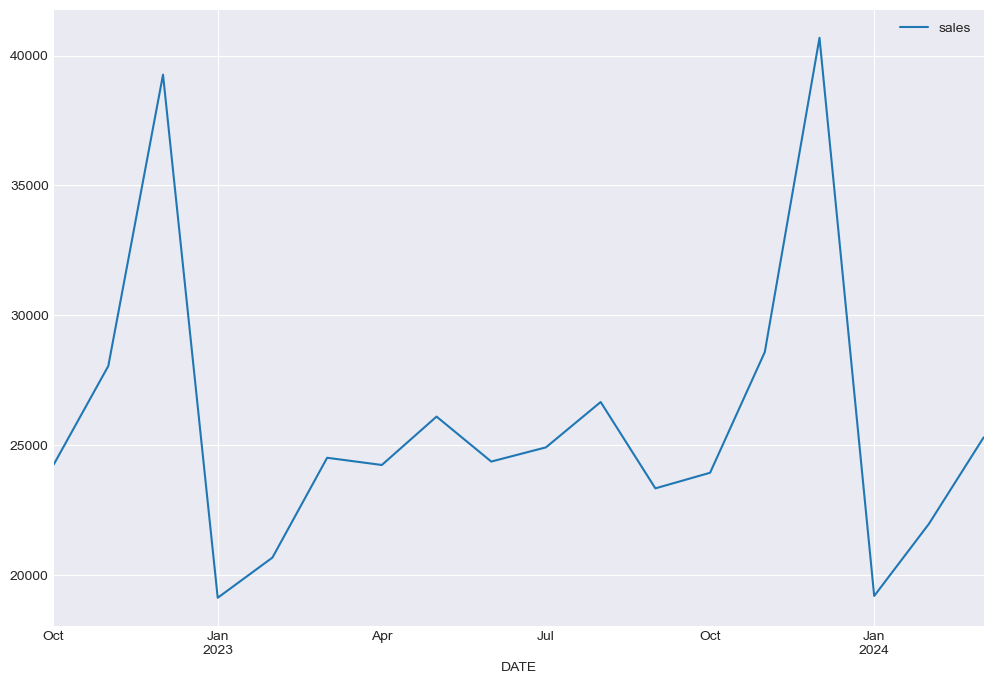

In [42]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(12,8))

In [43]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [44]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [45]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [46]:
# compile the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# use early_stop
model.compile(optimizer='adam', loss='mse')

In [48]:
# fit the model
early_stop = EarlyStopping(monitor='loss',patience=5)

In [49]:
history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
375/375 [==============================] - 4s 4ms/step - loss: 0.0198
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0136
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0108
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 8/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 9/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 10/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 11/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 12/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 13/30
375/375 [====

C:\Users\mandh\AppData\Local\Temp\ipykernel_16560\117035865.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


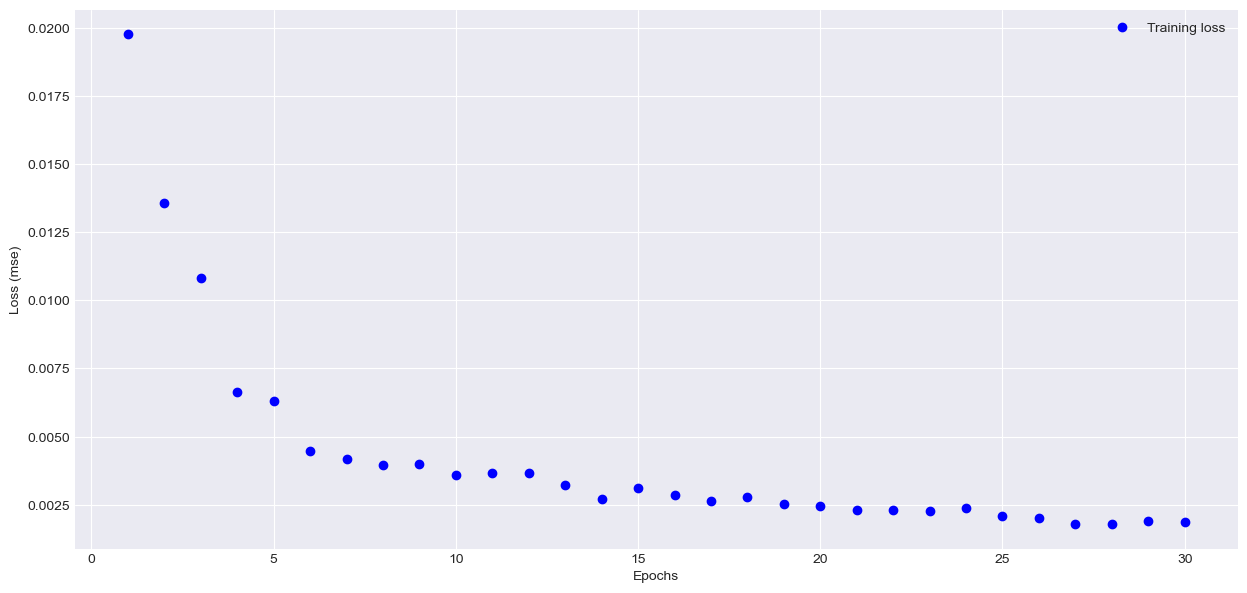

In [50]:
history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [51]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [52]:
forecast = scaler.inverse_transform(forecast)

In [53]:
forecast

array([[23088.41630381],
       [23461.75694698],
       [22741.67188865],
       [22567.5610159 ],
       [23457.99082518],
       [21826.38439083],
       [21885.53969461],
       [24990.16222322],
       [33758.65940195],
       [17216.68127668],
       [19533.53132528],
       [21303.59572715]])

In [54]:
df

,sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-11-01,28580.0
2023-12-01,40684.0
2024-01-01,19188.0


In [55]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [56]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [57]:
forecast_df

,Forecast
2024-01-01,23088.416304
2024-02-01,23461.756947
2024-03-01,22741.671889
2024-04-01,22567.561016
2024-05-01,23457.990825
2024-06-01,21826.384391
2024-07-01,21885.539695
2024-08-01,24990.162223
2024-09-01,33758.659402
2024-10-01,17216.681277


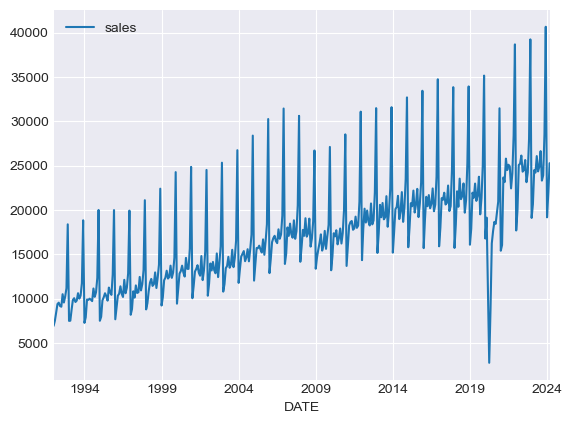

In [58]:
# Plot sales - Values in dataframe
df.plot();

<Axes: >

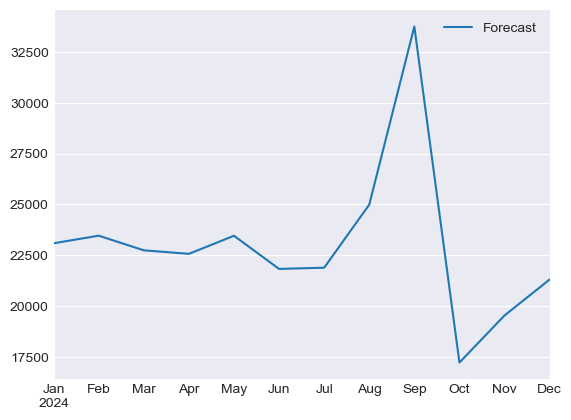

In [59]:
# Plot forecast - Values in forecast_df
forecast_df.plot()

<Axes: xlabel='DATE'>

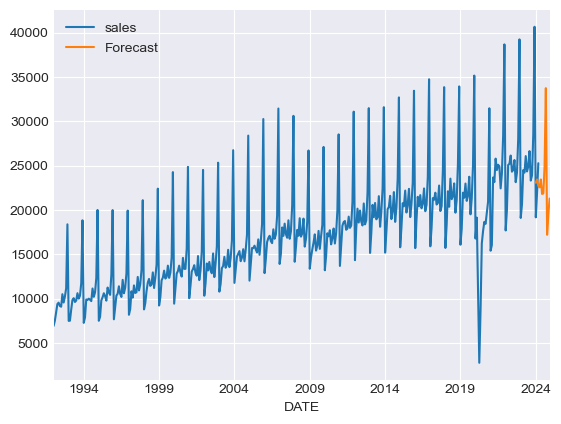

In [60]:
ax = df.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

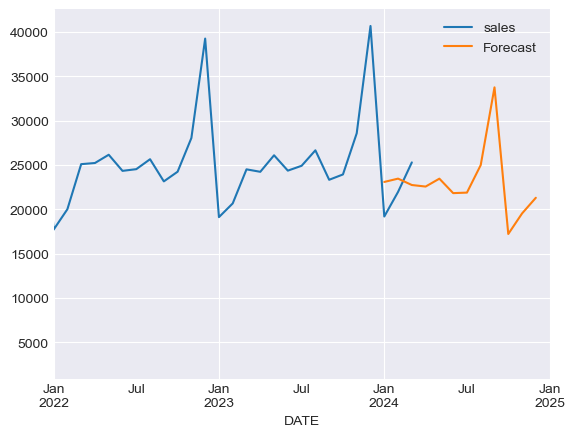

In [61]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')